In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

In [3]:
#opening the vector map
shp_path = 'Pumps.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

In [4]:
len(sf.shapes())


8

In [5]:
sf.records()

[Record #0: [0],
 Record #1: [0],
 Record #2: [0],
 Record #3: [0],
 Record #4: [0],
 Record #5: [0],
 Record #6: [0],
 Record #7: [0]]

In [6]:
sf.records()[0][0]

0

In [7]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [8]:
df = read_shapefile(sf)
df.shape

(8, 2)

In [9]:
df.sample(5)

,Id,coords
6,0,"[[529593.7270428849, 180660.45474864007]]"
4,0,"[[529613.205238149, 180896.80412119546]]"
1,0,"[[529192.5378675429, 181079.39137965103]]"
3,0,"[[529748.9110886676, 180924.2072511902]]"
0,0,"[[529396.5393954368, 181025.06304746034]]"


In [10]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, color='green', linestyle='dashed', marker='D',
     markerfacecolor='red', markersize=12)
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [11]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, color='green', linestyle='dashed', marker='D',
     markerfacecolor='red', markersize=12)
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

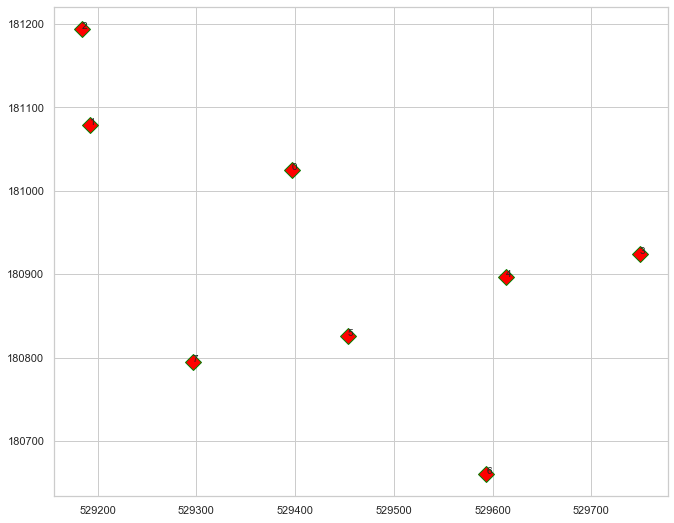

In [12]:
plot_map(sf)

In [13]:
#opening the vector map
shp_path_2 = 'Cholera_Deaths.shp'
#reading the shape file by using reader function of the shape lib
sf2 = shp.Reader(shp_path_2)

In [14]:
len(sf2.shapes())

250

In [15]:
df2 = read_shapefile(sf2)
df2.shape

(250, 3)

In [16]:
df2.head()

,Id,Count,coords
0,0,3,"[[529308.7414200425, 181031.3515464273]]"
1,0,2,"[[529312.163571333, 181025.17240113253]]"
2,0,1,"[[529314.3824294576, 181020.29368841863]]"
3,0,1,"[[529317.3796448297, 181014.25877068692]]"
4,0,4,"[[529320.6754489439, 181007.87162814138]]"


In [17]:
df2.rename(columns={0 :'Id'}, inplace=True)
df2.iloc[[1]]['Count']*2

1    4
Name: Count, dtype: int64

In [18]:
def plot_map_df2(df2, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0    
    for coord in df2['coords']:
        x = coord[0][0]
        y = coord[0][1]
        plt.plot(x, y, color='green', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=df2.iloc[[id]]['Count']*2)
        id=id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

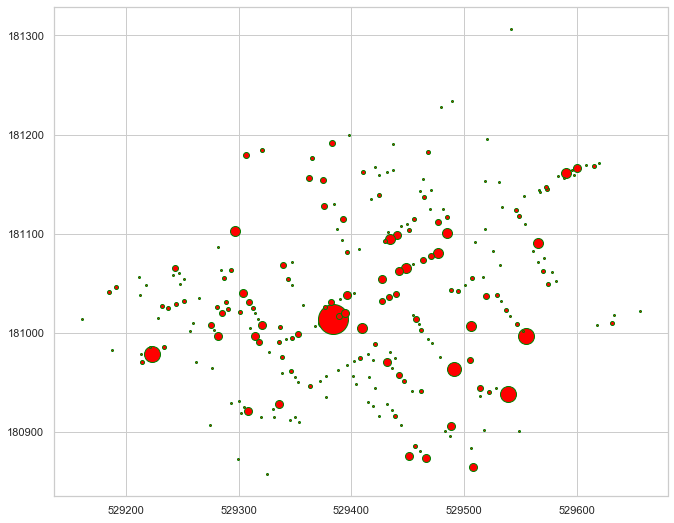

In [19]:
plot_map_df2(df2)

In [22]:
def plot_map_final(sf, df2, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    
    id=0    
    for coord in df2['coords']:
        x = coord[0][0]
        y = coord[0][1]
        plt.plot(x, y, color='green', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=df2.iloc[[id]]['Count']*2, label="Deaths")
        id=id+1
        
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, color='green', linestyle='dashed', marker='D',
     markerfacecolor='blue', markersize=12,label="Pump")
    
    colors = ['red', 'blue']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
    labels = ['Deaths', 'Pump']
    plt.legend(lines, labels)
    plt.tight_layout()
    plt.savefig('exam.png')
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

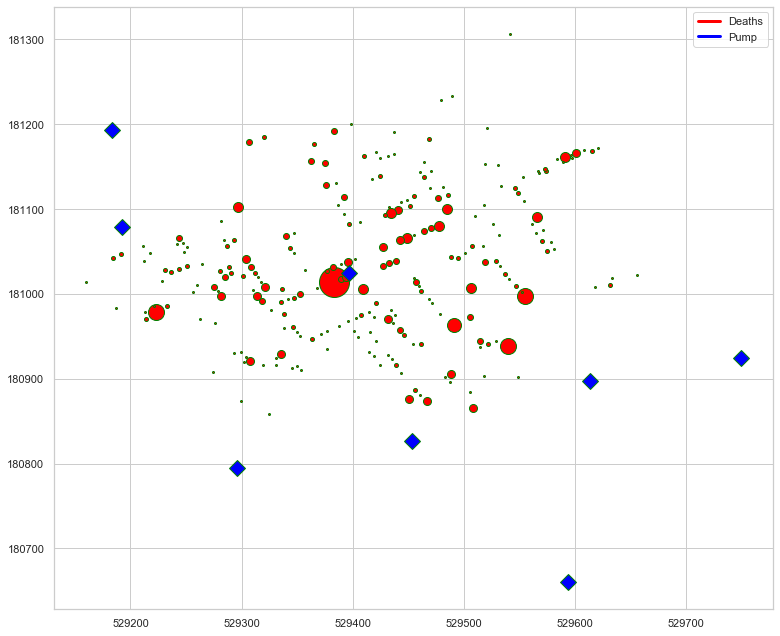

In [23]:
plot_map_final(sf,df2)